In [1]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_2/'

In [2]:
d = np.load(f'{source_path}/wv_forms.npz')
best_wvs = d['best_wvs']
all_stwvs = d['all_stwvs']
labels = d['labels']
X_reduced = d['X_reduced']

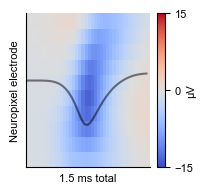

In [3]:
fig,ax = plt.subplots(figsize=(2,2))
im = ax.pcolormesh(all_stwvs[labels==0].mean(0),cmap='coolwarm',vmin=-15,vmax=15)
ax.plot(zscore(best_wvs[labels == 0].mean(0)) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='Neuropixel electrode',xticks=[],xlabel='1.5 ms total')
cbar = plt.colorbar(im,ticks=[-15,0,15])
cbar.set_label(label='\u00b5V',labelpad=-5)
#plt.savefig('./waveform_supp_fig/RS.jpg',bbox_inches='tight',dpi=300)
#ax.invert_yaxis()

[[], Text(0, 0.5, ''), [], Text(0.5, 0, '1.5 ms total')]

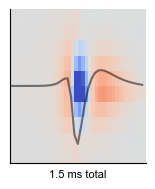

In [4]:
fig,ax = plt.subplots(figsize=(1.75,2))
ax.pcolormesh(all_stwvs[labels==1].mean(0),cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(best_wvs[labels == 1].mean(0)) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='',xticks=[],xlabel='1.5 ms total')
#plt.savefig('./waveform_supp_fig/FS.jpg',bbox_inches='tight',dpi=300)


[[], Text(0, 0.5, ''), [], Text(0.5, 0, '1.5 ms total')]

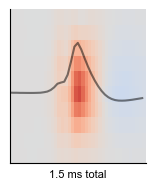

In [5]:
fig,ax = plt.subplots(figsize=(1.75,2))
ax.pcolormesh(all_stwvs[labels==2].mean(0),cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(best_wvs[labels == 2].mean(0)) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='',xticks=[],xlabel='1.5 ms total')
#plt.savefig('./waveform_supp_fig/PS.jpg',bbox_inches='tight',dpi=300)


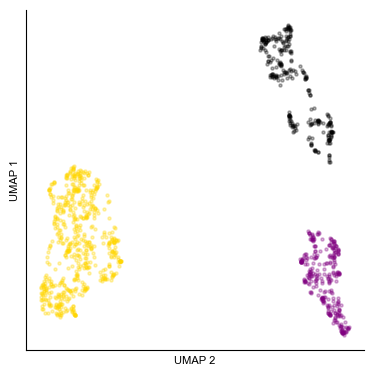

In [6]:
import matplotlib.pyplot as plt

# X_reduced is the result of UMAP: shape (1297, 2)
fig,ax = plt.subplots(figsize=(4,4))
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], s=5, alpha=0.3,color='gold')
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], s=5, alpha=0.3,color='k')
plt.scatter(X_reduced[labels==2, 0], X_reduced[labels==2, 1], s=5, alpha=0.3,color='purple')

#plt.title('Spectrotemporal waveform embedding')
plt.ylabel('UMAP 1')
plt.xlabel('UMAP 2')
plt.tight_layout()
ax.set(xticks=[],yticks=[])
#plt.savefig('./waveform_supp_fig/clustering.jpg',bbox_inches='tight',dpi=300)
pd.DataFrame({'x': X_reduced[:, 0],
              'y': X_reduced[:, 1], 
              'l': labels}).to_csv('./statistical_source/ED2/panela.csv')
plt.show()


In [7]:
pos_wvs = all_stwvs[labels == 2]
pos_wvs_best = best_wvs[labels == 2]

[[], Text(0, 0.5, 'Neuropixel \nelectrode'), [], Text(0.5, 0, '1.5 ms total')]

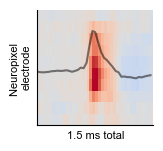

In [8]:
fig,ax = plt.subplots(figsize=(1.5,1.5))
ax.pcolormesh(pos_wvs[4],cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(pos_wvs_best[4]) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='Neuropixel \nelectrode',xticks=[],xlabel='1.5 ms total')
#plt.savefig('./waveform_supp_fig/PS_1.jpg',bbox_inches='tight',dpi=300)


[[], Text(0, 0.5, ''), [], Text(0.5, 0, '')]

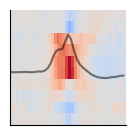

In [9]:
fig,ax = plt.subplots(figsize=(1.5,1.5))
ax.pcolormesh(pos_wvs[102],cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(pos_wvs_best[102]) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='',xticks=[],xlabel='')
#plt.savefig('./waveform_supp_fig/PS_2.jpg',bbox_inches='tight',dpi=300)


[[], Text(0, 0.5, ''), [], Text(0.5, 0, '')]

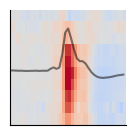

In [10]:
fig,ax = plt.subplots(figsize=(1.5,1.5))
ax.pcolormesh(pos_wvs[6],cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(pos_wvs_best[6]) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='',xticks=[],xlabel='')
#plt.savefig('./waveform_supp_fig/PS_3.jpg',bbox_inches='tight',dpi=300)


[[], Text(0, 0.5, ''), [], Text(0.5, 0, '')]

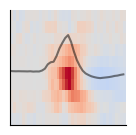

In [11]:
fig,ax = plt.subplots(figsize=(1.5,1.5))
ax.pcolormesh(pos_wvs[250],cmap='coolwarm',vmin=-30,vmax=30)
ax.plot(zscore(pos_wvs_best[250]) +5,'k',alpha=0.5)
ax.set(yticks=[],ylabel='',xticks=[],xlabel='')
#plt.savefig('./waveform_supp_fig/PS_4.jpg',bbox_inches='tight',dpi=300)


In [12]:
ts = []
for n in best_wvs[:,10:50]:
    trough = np.argmin(n)
    peak = np.argmax(n[trough:]) + trough
    ts.append(peak-trough)
ts = np.array(ts)
fs_spikes = 30000.
ts = (ts / fs_spikes)*1000000


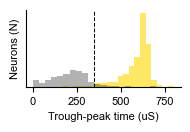

In [13]:
fig, ax = plt.subplots(figsize=(2,1))
plt.hist(ts[labels==0],bins=20,alpha=0.6,color='gold')
plt.hist(ts[labels==2],bins=20,alpha=0.3,color='k')
ax.axvline(350,color='k',linestyle='--',linewidth=0.75)
ax.set(xlabel='Trough-peak time (uS)',yticks=[],ylabel='Neurons (N)')
#plt.savefig('./waveform_supp_fig/trough_peak_time.jpg',bbox_inches='tight',dpi=300)
pd.DataFrame({'ts':ts, 'labels':labels}).to_csv('./statistical_source/ED2/panelc.csv')

In [15]:
from scipy.stats import mannwhitneyu
mannwhitneyu(ts[labels==0],
             ts[labels==2])
print(len(ts[labels==0]))
print(len(ts[labels==1]))

587
279


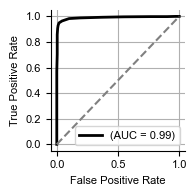

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example input
# scores1 = np.array([...])  # Group 1
# scores2 = np.array([...])  # Group 2
scores1 = ts[labels==1]
scores2 = ts[labels==0]
# Combine scores and create binary labels
scores = np.concatenate([scores1, scores2])
labels_ = np.concatenate([np.zeros_like(scores1), np.ones_like(scores2)])

# Compute ROC
fpr, tpr, thresholds = roc_curve(labels_, scores)
roc_auc = auc(fpr, tpr)

# Find best threshold using Youden's J statistic
j_scores = tpr - fpr
j_best_idx = np.argmax(j_scores)
best_thresh = thresholds[j_best_idx]
best_fpr = fpr[j_best_idx]
best_tpr = tpr[j_best_idx]

# Plot
fig,ax = plt.subplots(figsize=(2,2))
ax.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})', lw=2,color='k')
# plt.scatter(best_fpr, best_tpr, color='red', zorder=5,
#             label=f'Best threshold = {best_thresh:.2f}')
# plt.scatter(fpr[np.round(thresholds)==367], tpr[np.round(thresholds)==367], color='red', zorder=5)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC curve FS vs RS (trough-peak time)')
plt.legend()
plt.grid(True)
#plt.savefig('./waveform_supp_fig/roc.jpg',bbox_inches='tight',dpi=300)

plt.tight_layout()
plt.show()

# Example usage:
#best_threshold = plot_roc_with_best_threshold(ts[labels==2], ts[labels==0])
